In [1]:
import os
from os.path import split as split_path

DATA_BASE_DIR = "/geosat2/julaiti/tsv_all"
TRAINING_FILES_DESC = os.path.join(DATA_BASE_DIR, "training_files_desc.txt")
TESTING_FILES_DESC = os.path.join(DATA_BASE_DIR, "testing_files_desc.txt")
VALIDATION_FILES_DESC = os.path.join(DATA_BASE_DIR, "validation_files_desc.txt")

with open(TRAINING_FILES_DESC) as f:
    training_files = f.readlines()
with open(VALIDATION_FILES_DESC) as f:
    validation_files = f.readlines()
with open(TESTING_FILES_DESC) as f:
    testing_files = f.readlines()

In [28]:
import pandas as pd
import io

df = []
for dtype, file_list in [("train", training_files), ("validation", validation_files), ("test", testing_files)]:
    print(dtype)
    regions = []
    num_measures = []
    for i, filename in enumerate(file_list):
        prog = (i + 1) * 100.0 / len(file_list)
        print("\r" + ' ' * 20 + "\r", end='')
        print("%.2f" % (prog), end='')
        filename = filename.strip()
        with io.open(filename, 'r', newline='\n') as f:
            num_lines = len(f.readlines())
        region = filename.split('/')[-2]
        regions.append(region)
        num_measures.append(num_lines)
    df.append(pd.DataFrame.from_dict({
        "region": regions,
        "num_measures": num_measures,
        "purpose": dtype,
    }))

train
0.47                

KeyboardInterrupt: 

In [20]:
df

[]

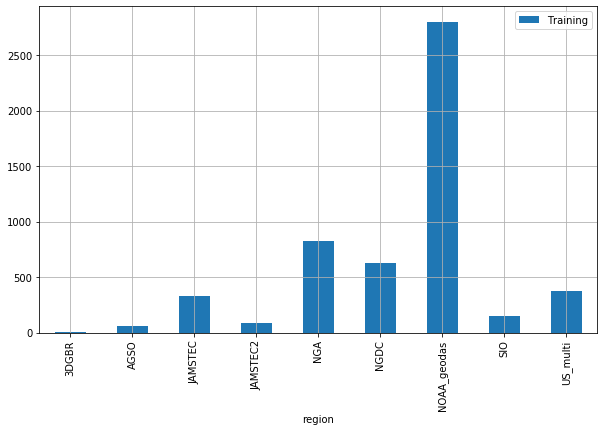

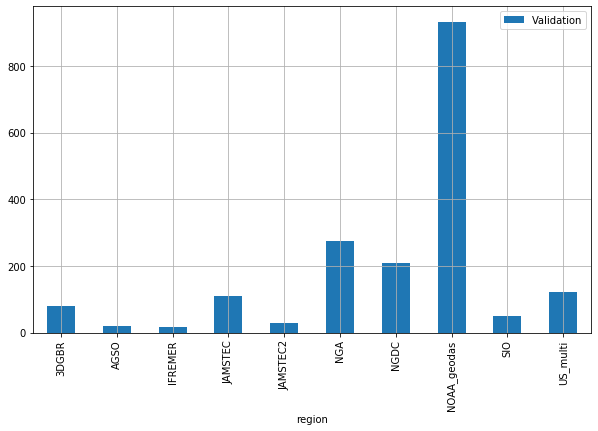

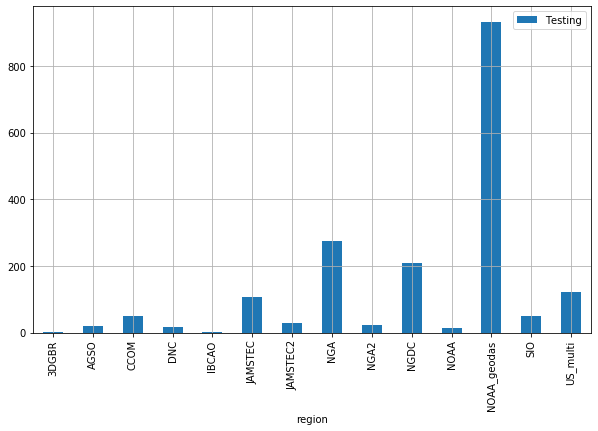

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_pickle("training.pkl")
df["records"] = 1
df.groupby("region").sum() \
    .rename(columns={"records": "Training"}) \
    .plot(kind='bar', ax=ax);
ax.grid();

fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_pickle("validation.pkl")
df["records"] = 1
df.groupby("region").sum() \
    .rename(columns={"records": "Validation"}) \
    .plot(kind='bar', ax=ax);
ax.grid();


fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_pickle("testing.pkl")
df["records"] = 1
df.groupby("region").sum() \
    .rename(columns={"records": "Testing"}) \
    .plot(kind='bar', ax=ax);
ax.grid();

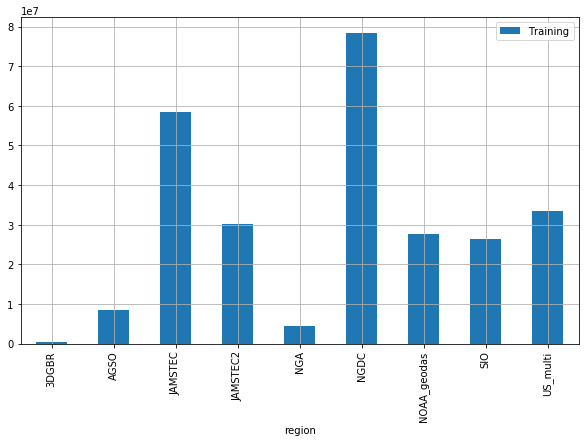

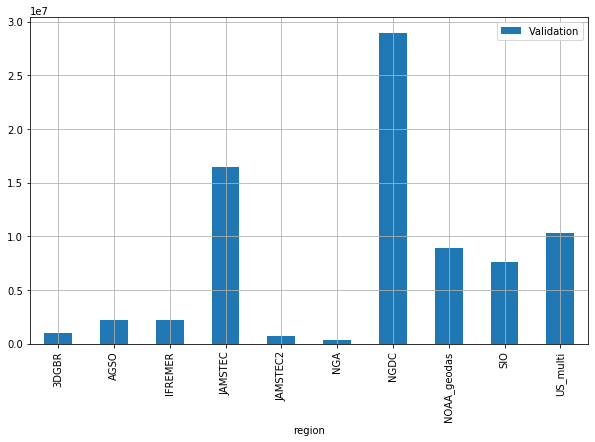

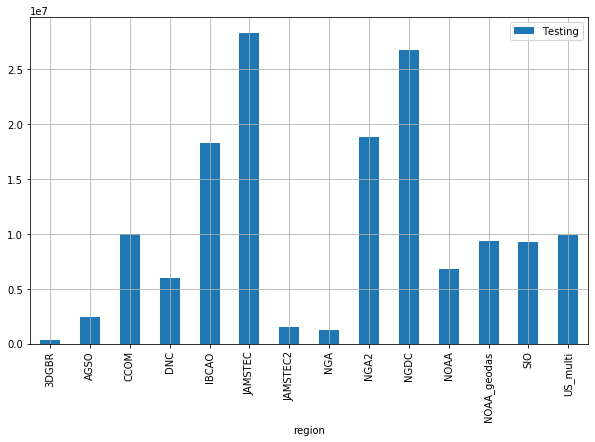

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd


fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_pickle("training.pkl")
df.groupby("region").sum() \
    .rename(columns={"records": "Training"}) \
    .plot(kind='bar', ax=ax);
ax.grid();

fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_pickle("validation.pkl")
df.groupby("region").sum() \
    .rename(columns={"records": "Validation"}) \
    .plot(kind='bar', ax=ax);
ax.grid();


fig, ax = plt.subplots(figsize=(10, 6))
df = pd.read_pickle("testing.pkl")
df.groupby("region").sum() \
    .rename(columns={"records": "Testing"}) \
    .plot(kind='bar', ax=ax);
ax.grid();

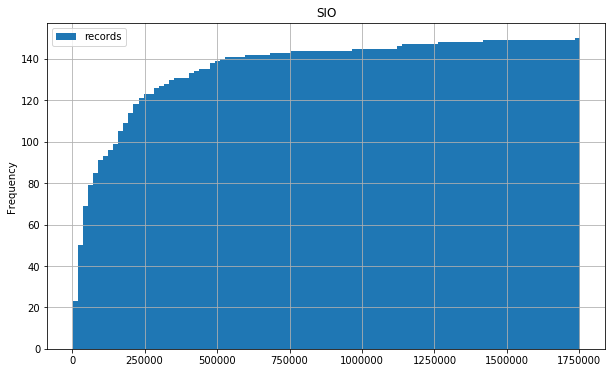

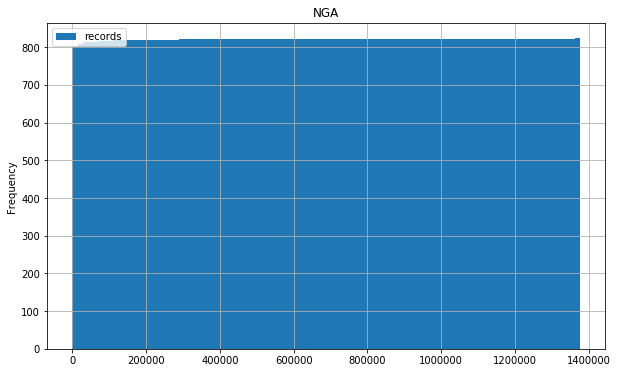

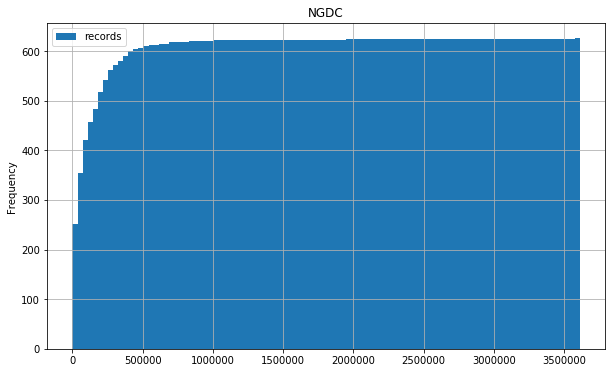

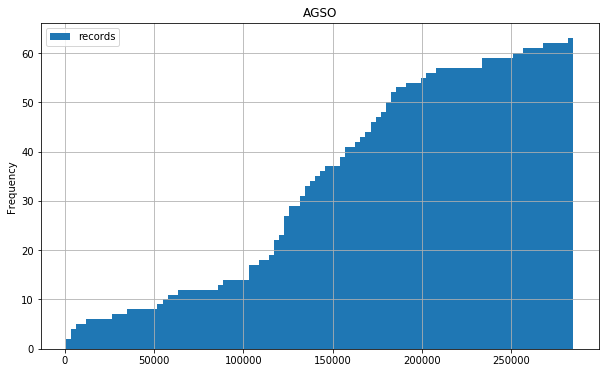

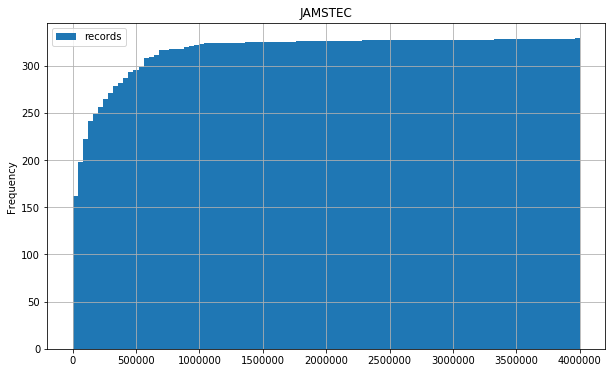

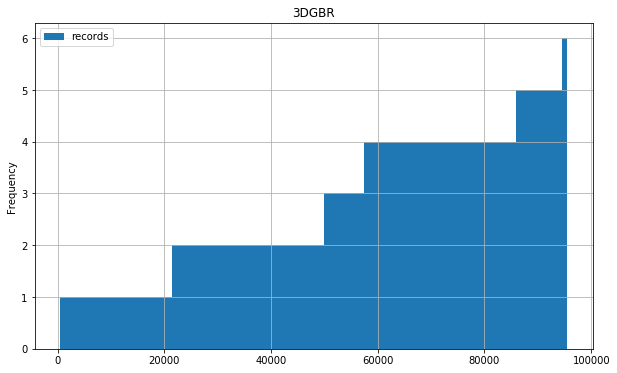

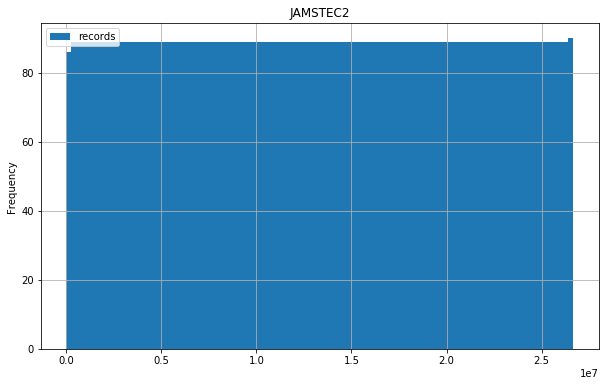

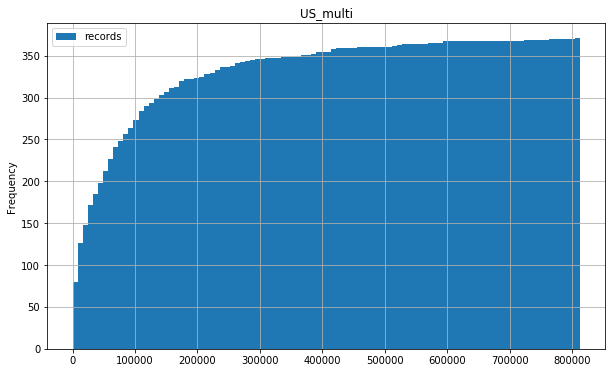

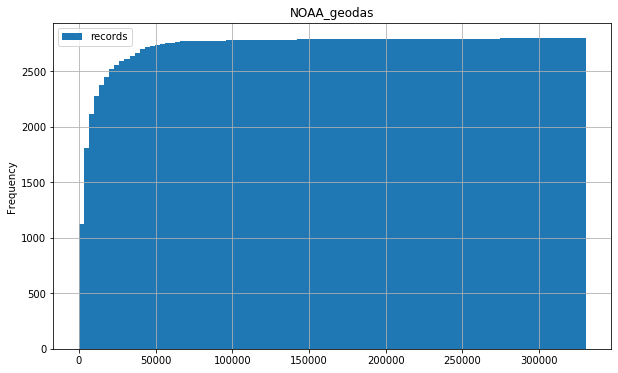

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

regions = list(set(df["region"]))
for r in regions:
    fig, ax = plt.subplots(figsize=(10, 6))
    df[df["region"] == r].plot.hist(bins=100, cumulative=True, ax=ax);
    ax.grid();
    ax.set_title(r)

In [11]:
df = pd.read_pickle("training.pkl")
records = df["records"]
records = sorted(records, reverse=True)

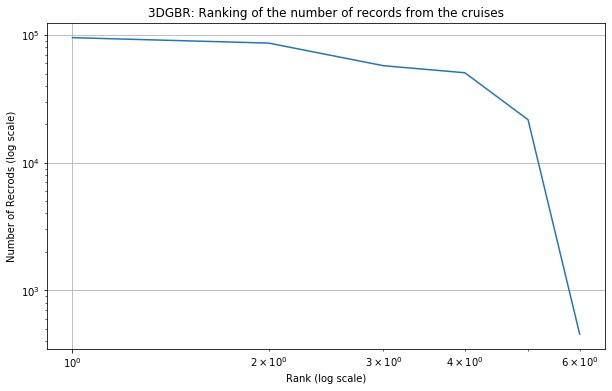

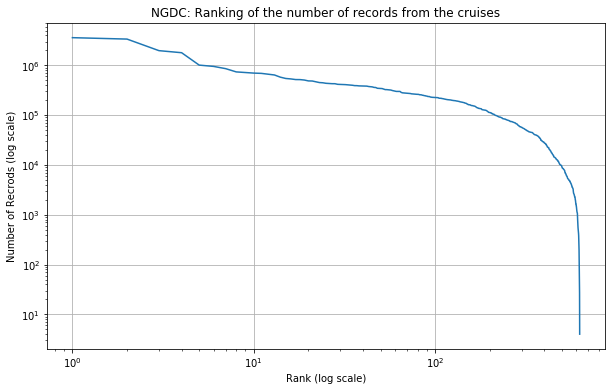

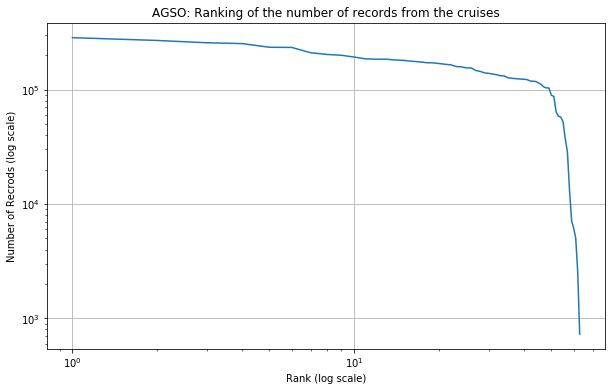

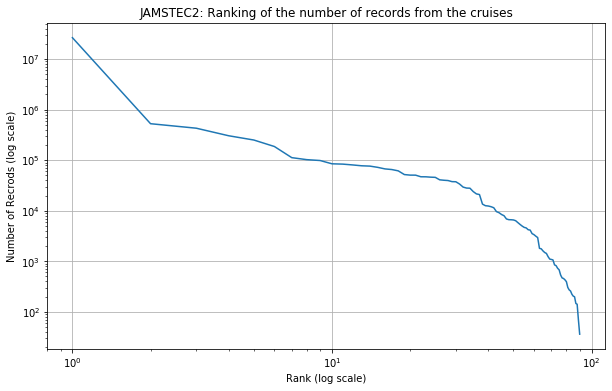

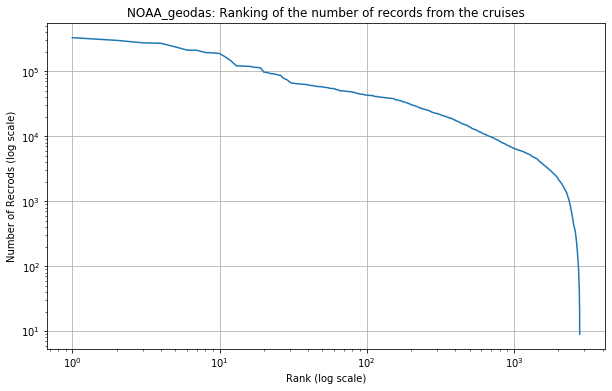

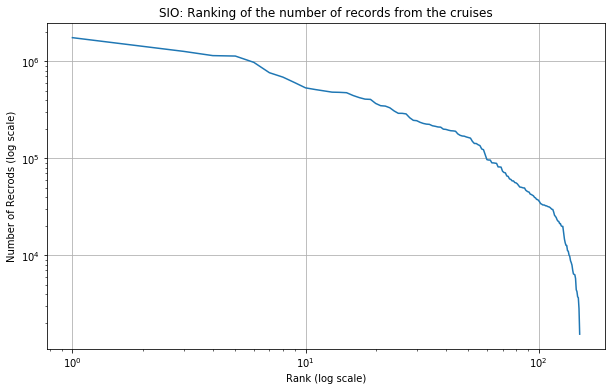

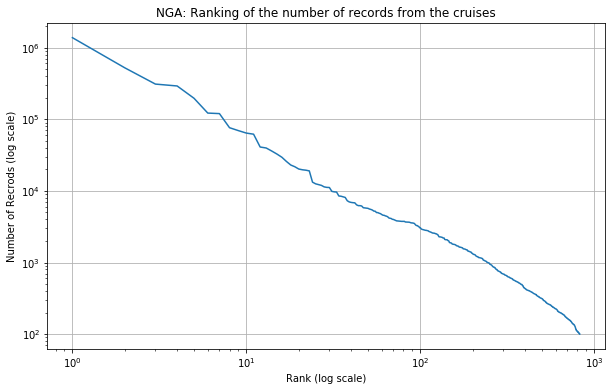

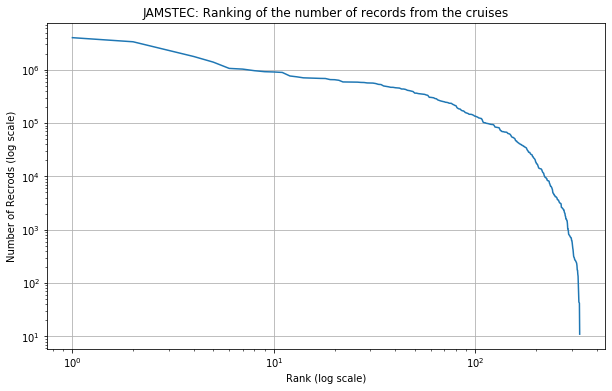

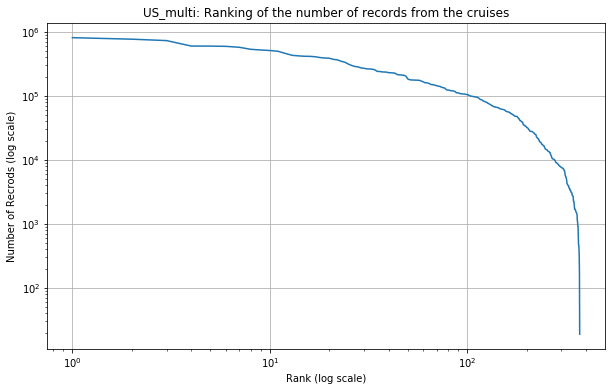

In [14]:
for region in set(df["region"]):
    records = df[df["region"] == region]["records"]
    records = sorted(records, reverse=True)
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax = [ax]
    ax[0].loglog(list(range(1, len(records) + 1)), records);
    ax[0].grid();
    ax[0].set_xlabel("Rank (log scale)")
    ax[0].set_ylabel("Number of Recrods (log scale)")
    ax[0].set_title("{}: Ranking of the number of records from the cruises".format(region));

    '''
    k = 1000

    ax[1].plot(list(range(k, len(records) + 1)), records[k-1:]);
    ax[1].grid();
    ax[1].set_xlabel("Rank")
    ax[1].set_ylabel("Number of Recrods")
    ax[1].set_title("Ranking from the Number 1000 to the end");
    '''

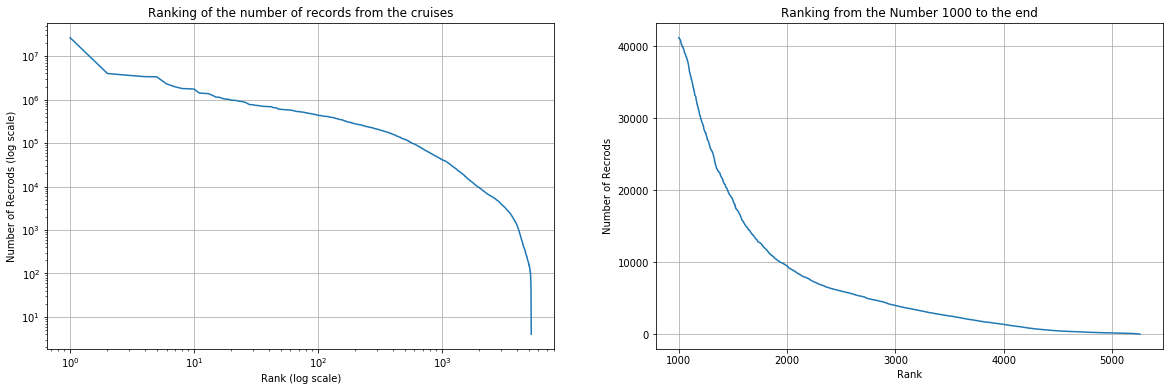

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].loglog(list(range(1, len(records) + 1)), records);
ax[0].grid();
ax[0].set_xlabel("Rank (log scale)")
ax[0].set_ylabel("Number of Recrods (log scale)")
ax[0].set_title("Ranking of the number of records from the cruises");


k = 1000

ax[1].plot(list(range(k, len(records) + 1)), records[k-1:]);
ax[1].grid();
ax[1].set_xlabel("Rank")
ax[1].set_ylabel("Number of Recrods")
ax[1].set_title("Ranking from the Number 1000 to the end");

In [51]:
sum(records[:1000]) / sum(records)

0.8871555718266888